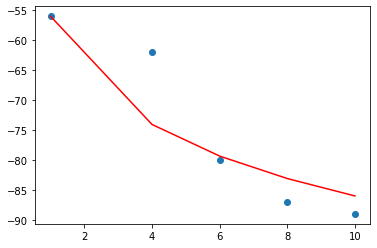

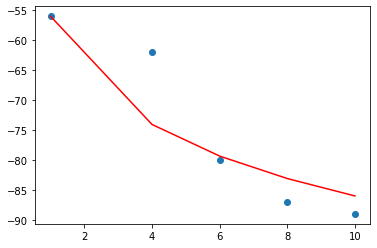

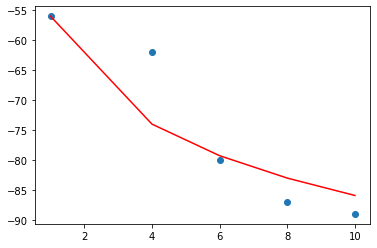

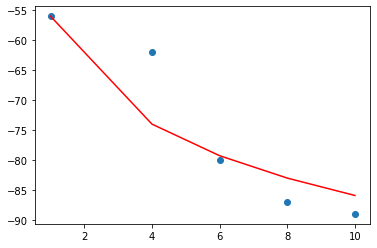

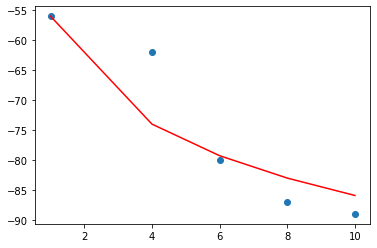

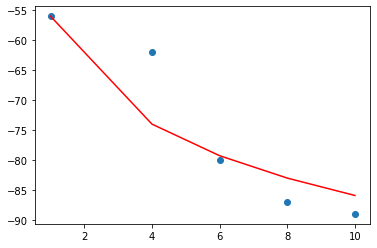

`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 8.5092e+01, final cost 8.5083e+01, first-order optimality 6.75e-14.
parámetros hallados
[2.99198028]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit,least_squares
from scipy.optimize import least_squares
from math import log

df = pd.DataFrame()

Distancia = [1,4,6,8,10]
RSSI = [-56,-62,-80,-87,-89]

df['Dist'] = Distancia
df['RSSI'] = RSSI

    
x_datos = (df['Dist'])
y_datos_t1 = df['RSSI']
y_datos_t1 = np.array(y_datos_t1)

parametros_inicial=[3]  # Ajustado por la función
param_list = []


#########################Ajuste de la Función##################################
def modelo(p,x):
    # p es un vector con los parámetros
    # x es el vector de datos x
    return (-10*p[0]*np.log10(x_datos))+(-56)
    #return ((1-p[0])/(1+np.exp(p[1]*(((2*x_datos)/p[2])-1))))+ p[0]
    #return ((1-0.05)/(1+np.exp(4*(((2*x_datos)/30)-1))))+ 0.05

def residuos(p, x, y):
    # p es un vector con los parámetros
    # x es el vector de datos x
    # y es el vector de datos y
    y_modelo = modelo(p, x)
    plt.clf()
    plt.plot(x,y,'o',x,y_modelo,'r-')
    plt.pause(0.05)
    param_list.append(p)
    return y_modelo - y

# Calculamos la matriz de covarianza "pcov"
def calcular_cov(res,y_datos):
    U, S, V = np.linalg.svd(res.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)

    s_sq = 2 * res.cost / (y_datos.size - res.x.size)
    pcov = pcov * s_sq
    return pcov

#########################Ajuste de la Funcion_Tiempo1##################################

res_t1 = least_squares(residuos, parametros_iniciales, args=(x_datos, y_datos_t1), verbose=1)
# Estos son los parámetros hallados:
print('parámetros hallados')
print(res_t1.x)

pcov_t1 = calcular_cov(res_t1,y_datos_t1)
# De la matriz de covarinza podemos obtener los valores de desviación estándar
# de los parametros hallados
pstd = np.sqrt(np.diag(pcov_t1))

y_modelo_t1 = modelo(res_t1.x, x_datos)